In [1]:
%load_ext autoreload
%autoreload 2

from infomap import Infomap
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from matching import create_bipartite_graph, similarity, match, draw_match, color_graph

In [2]:
def run_infomap(G, **kwargs):
    im = Infomap(**kwargs)
    im.add_networkx_graph(G)
    im.run()
    return im.get_dataframe(["module_id", "flow", "node_id"])

karate = nx.karate_club_graph()

m1 = run_infomap(karate, markov_time=0.8)

karate.add_edge(34, 35)
karate.add_edge(35, 36)
karate.add_edge(36, 34)
m2 = run_infomap(karate, markov_time=1.4)

In [3]:
def group_to_dict(grouped):
    m = defaultdict(list)
    for group, nodes in grouped:
        for node in nodes.itertuples():
            m[group].append((node.node_id, node.flow))
            
    return dict(m)

m1 = group_to_dict(m1.groupby("module_id"))
m2 = group_to_dict(m2.groupby("module_id"))

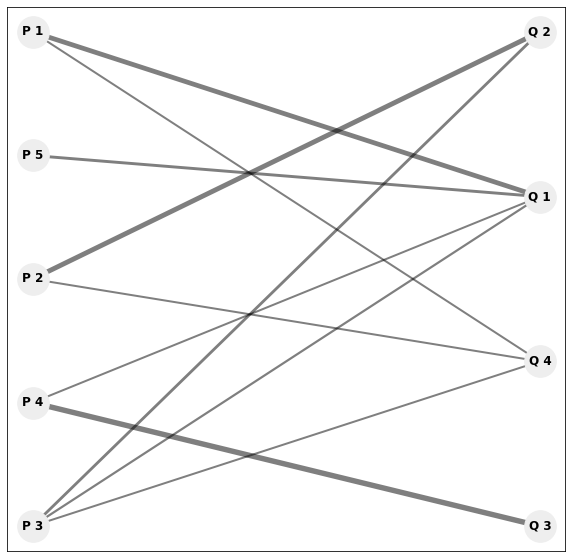

In [4]:
# for illustration, not needed
S = similarity(m1, m2)
B = create_bipartite_graph(*S)
pos = draw_match(B)

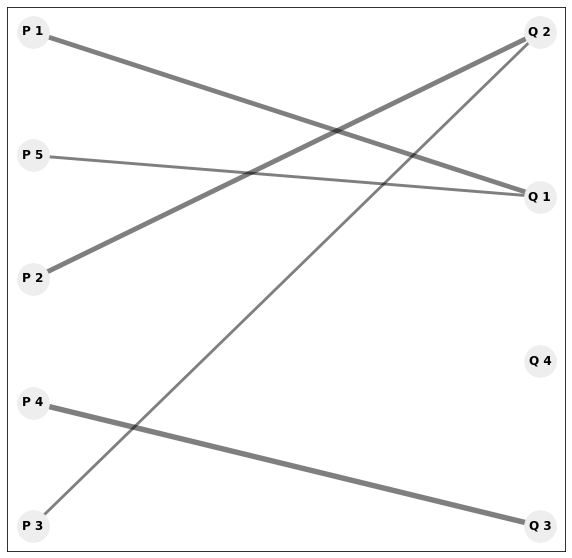

In [5]:
M = match(m1, m2, threshold=1e-6)
_ = draw_match(M, pos=pos)

In [6]:
colors = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854']
color_graph(M, colors)

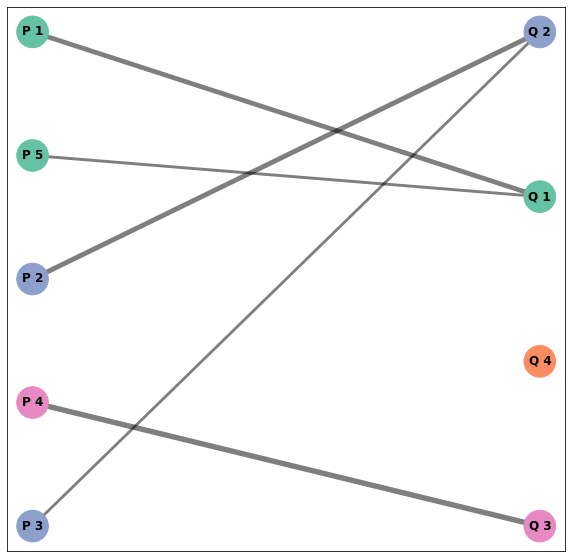

In [7]:
_ = draw_match(M, pos=pos)

In [8]:
M.edges.data("weight")

EdgeDataView([('P 1', 'Q 1', 0.8659812973204372), ('Q 1', 'P 5', 0.37998100915169075), ('P 2', 'Q 2', 0.8957320204655579), ('Q 2', 'P 3', 0.34537017234235345), ('P 4', 'Q 3', 0.9999999999999999)])

In [9]:
M.nodes.data("module")

NodeDataView({'P 1': 1, 'Q 1': 1, 'Q 4': 4, 'P 2': 2, 'Q 2': 2, 'P 3': 3, 'P 4': 4, 'Q 3': 3, 'P 5': 5}, data='module')